# 제 3회 인사이콘 - 만수오리민트초코 팀
- **팀원 : 인사이트 6기 오서영, 임영선, 이윤주 / 오서영 동생 오만수**

- 일시 : 2021.11.25 목요일 

- 주제 : 북미에서 보트를 열심히 팔아보자

- 모델1. (kmeans, GMM)
- 모델2. MS
<img src="mansoo.jpeg" align="left" height="100px" width="300px">

## 전처리 및 피쳐 선정

In [54]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math
%matplotlib inline

data_=pd.read_csv('Data_Case3.csv')
data_.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


**피쳐 선정**
- Q1(보트에 대한 신념), Q16(브랜드 에쿼티) : 1~5의 척도, 가장 많은 하위 문항
- Q1을 계층적 군집분석으로 나눠본 후, 그 중 마지막 군집이었던 피쳐들을 넣고 진행해봄

In [55]:
data_cleaning = data_.copy()

data_cleaning = data_cleaning[['Q1.13', 'Q1.14', 'Q1.26', 'Q1.28', 'Q1.27', 'Q1.17', 'Q1.20','Q1.3', 'Q1.9','Q1.16'
                           ,'Q16.15']]
#데이터 정규화
scaler = StandardScaler()
data_cleaning[:] = scaler.fit_transform(data_cleaning[:])
data_cleaning.head()

,Q1.13,Q1.14,Q1.26,Q1.28,Q1.27,Q1.17,Q1.20,Q1.3,Q1.9,Q1.16,Q16.15
0,2.014297,1.806394,1.955336,0.703498,-0.148794,0.938397,0.869481,1.846000,1.964225,0.859111,0.152210
1,0.995377,0.776731,1.003057,0.703498,0.804640,-0.087132,-0.162523,0.866411,1.034968,-0.096854,0.152210
2,2.014297,1.806394,1.955336,-0.314475,-0.148794,0.938397,-0.162523,0.866411,1.034968,0.859111,1.422733
3,2.014297,1.806394,1.003057,-0.314475,-0.148794,-0.087132,-0.162523,-0.113177,0.105710,0.859111,1.422733
4,2.014297,0.776731,1.955336,0.703498,0.804640,1.963926,0.869481,0.866411,1.964225,1.815075,0.152210


## k-means
- 군집 개수를 정하기 위한 elbow curve

- inertia_ : 각 군집의 중심에서 해당군집에 포함된 데이터간 거리의 합 <- 모든 군집에 대해 계산하여 합함

  (inertia 값이 작을수록 전체적으로 군집화가 잘 되었다는 뜻)
- distortions = 각 점에서 할당된 클러스터의 중심까지의 제곱 거리 합계, **경사 가파르고, 변곡점이 되는 팔꿈치가 최적의 k**

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_cleaning)

<ipython-input-57-bae3aa6c1f1b>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


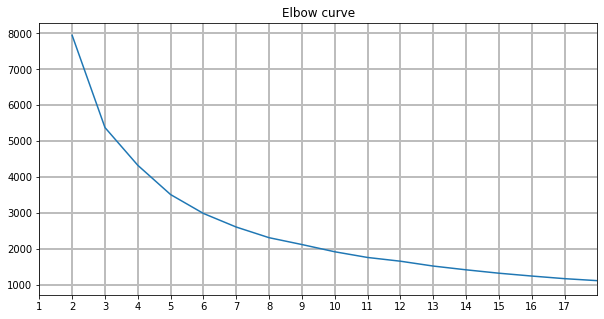

In [57]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_transformed)
    distortions.append(kmeans.inertia_)

fig= plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([1, 18])
ax.set_xticks([i for i in range(1,18)])
ax.grid(color='#BDBDBD', linestyle='-', linewidth=2)
plt.title('Elbow curve')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(data_cleaning)

KMeans(n_clusters=4, random_state=0)

In [59]:
data_cleaning['cluster'] = kmeans.labels_
data_cleaning.head()

,Q1.13,Q1.14,Q1.26,Q1.28,Q1.27,Q1.17,Q1.20,Q1.3,Q1.9,Q1.16,Q16.15,cluster
0,2.014297,1.806394,1.955336,0.703498,-0.148794,0.938397,0.869481,1.846000,1.964225,0.859111,0.152210,3
1,0.995377,0.776731,1.003057,0.703498,0.804640,-0.087132,-0.162523,0.866411,1.034968,-0.096854,0.152210,0
2,2.014297,1.806394,1.955336,-0.314475,-0.148794,0.938397,-0.162523,0.866411,1.034968,0.859111,1.422733,3
3,2.014297,1.806394,1.003057,-0.314475,-0.148794,-0.087132,-0.162523,-0.113177,0.105710,0.859111,1.422733,0
4,2.014297,0.776731,1.955336,0.703498,0.804640,1.963926,0.869481,0.866411,1.964225,1.815075,0.152210,3


### PCA

In [60]:
pca2 = PCA(n_components=2)
pca_transformed2 = pca.fit_transform(data_cleaning)

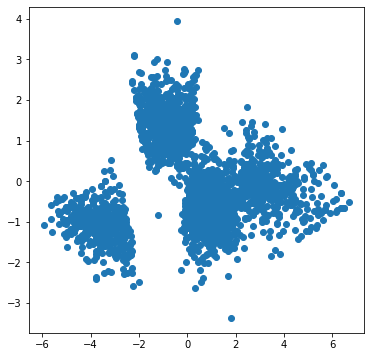

In [61]:
#data_cleaning 데이터프레임에 pca 성분 두 개 추가
data_cleaning['pca_x'] = pca_transformed2[:, 0]
data_cleaning['pca_y'] = pca_transformed2[:, 1]

#데이터 살펴보기
plt.figure(figsize=(6,6))
plt.scatter(data_cleaning['pca_x'],data_cleaning['pca_y'])

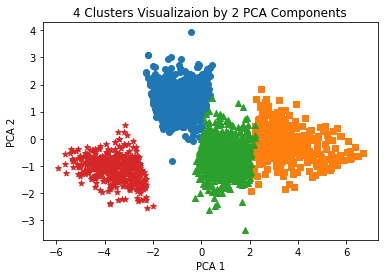

In [62]:
#시각화
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = data_cleaning[data_cleaning['cluster']==0].index
marker1_ind = data_cleaning[data_cleaning['cluster']==1].index
marker2_ind = data_cleaning[data_cleaning['cluster']==2].index
marker3_ind = data_cleaning[data_cleaning['cluster']==3].index

#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o,s,^로 마커 표시
plt.scatter(x=data_cleaning.loc[marker0_ind, 'pca_x'], y=data_cleaning.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=data_cleaning.loc[marker1_ind, 'pca_x'], y=data_cleaning.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=data_cleaning.loc[marker2_ind, 'pca_x'], y=data_cleaning.loc[marker2_ind, 'pca_y'], marker='^')
plt.scatter(x=data_cleaning.loc[marker3_ind, 'pca_x'], y=data_cleaning.loc[marker3_ind, 'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualizaion by 2 PCA Components')
plt.show()

### 실루엣 계수 시각화 

In [63]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels) #실루엣계수
        sil_values = silhouette_samples(X_features, cluster_labels) #개별 실루엣 값
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

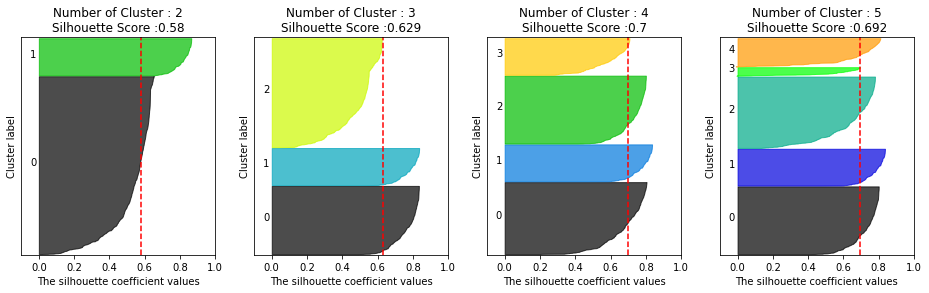

In [64]:
visualize_silhouette([ 2, 3, 4, 5], data_cleaning.iloc[:,-3:-1])

### 실루엣 계수

In [49]:
score_samples = silhouette_samples(data_cleaning.iloc[:,-3:-1], kmeans.labels_)
score=silhouette_score(data_cleaning.iloc[:,-3:-1], kmeans.labels_)
data_cleaning['silhouette_coeff'] = score_samples
print('최종 전체 실루엣 계수', score)

최종 전체 실루엣 계수 0.6998763766369304


**개별 실루엣 계수**

In [50]:
#개별 실루엣 계수 출력
data_cleaning.groupby(['cluster'])['silhouette_coeff'].mean()

cluster
0    0.729010
1    0.595695
2    0.685661
3    0.777333
Name: silhouette_coeff, dtype: float64

### 군집별 칼럼 추출
- minQ1.9(지위의 척도 x), max Q16.5(화려한 보트 많다), 군집 4개는 **점수별**로 구분됨
- MAX Q16.5 : 브랜드 에쿼티 (보트 브랜드에 부여하는 가치 -"귀하가 잘 알고 있는 브랜드에 대한 진술에 얼만나 동의하는지") 중
  
  -> 군중으로부터 눈에 띄는 보트를 제공하는가?
- MIN Q1.9 : 보트와 관련하여 가지는 태도, 신념 중 "나는 보트를 지위의 척도로 본다"

- MIN from group 1 : Q1.26 "나에게 가장 중요한 것은 강력한 보트를 갖는 것이다"


- 3. 내가 구매하는 보트의 브랜드는 **내가 누구인지**를 많이 말해준다.
- 9. 나는 보트를 **지위의 척도**로 본다.
- 13. 보트를 살 때, 나는 **최신식**의 가장 좋은 보트를 사는 경향이 있다.
- 14. 내 보트의 **액세서리**를 살 때, 나는 최신의, **가장 좋은 것**을 사는 경향이 있다.
- 16. 사람들은 보트 타기(boating)에 대한 **조언**을 듣기 위해 나에게 오는 경향이 있다.
- 17. 나는 보트 타는 **동료들보다 보트 타는 것에 대해 더 잘 알고 있다**고 생각한다.
- 20. **보트 위에 있지 않을 때도**, 나는 종종 보트 관련 활동을 하는 내 자신을 발견한다.
- 26. 나에게 가장 중요한 것은 **강력한 보트**를 갖는 것이다.
- 27. 보트타기(boating)는 내가 **여가시간**에 가장 많이 하는 일이다.
- 28. 보트타기(boating)는 내 **인생의 진정한 열정**이다.

In [14]:
#정제되지 않은 점수 데이터
df=data_[['Q1.13', 'Q1.14', 'Q1.26', 'Q1.28', 'Q1.27', 'Q1.17', 'Q1.20','Q1.3', 'Q1.9','Q1.16', 'Q16.15']] 
df.head()

,Q1.13,Q1.14,Q1.26,Q1.28,Q1.27,Q1.17,Q1.20,Q1.3,Q1.9,Q1.16,Q16.15
0,5,5,5,4,3,4,4,5,5,4,4
1,4,4,4,4,4,3,3,4,4,3,4
2,5,5,5,3,3,4,3,4,4,4,5
3,5,5,4,3,3,3,3,3,3,4,5
4,5,4,5,4,4,5,4,4,5,5,4


In [15]:
group0=marker0_ind
group1=marker1_ind
group2=marker2_ind
group3=marker3_ind
zero=df.iloc[group0]
one=df.iloc[group1]
two=df.iloc[group2]
three=df.iloc[group3]

In [16]:
zero.mean(axis=0) #max Q16.15 / min Q1.9

Q1.13     3.248045
Q1.14     3.524022
Q1.26     3.216760
Q1.28     3.686034
Q1.27     3.568715
Q1.17     3.376536
Q1.20     3.531844
Q1.3      3.373184
Q1.9      3.170950
Q1.16     3.530726
Q16.15    3.966480
dtype: float64

In [17]:
one.mean(axis=0) #max Q16.15 / min Q1.26 

Q1.13     2.026915
Q1.14     2.231884
Q1.26     1.884058
Q1.28     2.188406
Q1.27     2.018634
Q1.17     2.064182
Q1.20     2.134576
Q1.3      2.078675
Q1.9      1.890269
Q1.16     1.919255
Q16.15    3.554865
dtype: float64

In [18]:
two.mean(axis=0) #max Q16.15 / min Q1.9

Q1.13     2.724684
Q1.14     2.956751
Q1.26     2.625527
Q1.28     3.011603
Q1.27     2.803797
Q1.17     2.804852
Q1.20     2.845992
Q1.3      2.812236
Q1.9      2.520042
Q1.16     2.760549
Q16.15    3.716245
dtype: float64

In [19]:
three.mean(axis=0) #max Q16.15 / min Q1.9

Q1.13     4.178645
Q1.14     4.301848
Q1.26     4.129363
Q1.28     4.305955
Q1.27     4.211499
Q1.17     4.106776
Q1.20     4.090349
Q1.3      4.260780
Q1.9      4.063655
Q1.16     4.147844
Q16.15    4.363450
dtype: float64

## GMM

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
dt=data_cleaning.copy()
dt=dt.iloc[:,:-1]
gmm = GaussianMixture(n_components=4, covariance_type = 'full', random_state=0).fit(dt)
gmm_cluster_labels = gmm.predict(dt)

# 군집화 결과를 'gmm_cluster' 칼럼 명으로 저장
dt['gmm_cluster'] = gmm_cluster_labels
dt

,Q1.13,Q1.14,Q1.26,Q1.28,Q1.27,Q1.17,Q1.20,Q1.3,Q1.9,Q1.16,Q16.15,cluster,pca_x,pca_y,gmm_cluster
0,2.014297,1.806394,1.955336,0.703498,-0.148794,0.938397,0.869481,1.846000,1.964225,0.859111,0.152210,3,-4.199256,-1.907343,3
1,0.995377,0.776731,1.003057,0.703498,0.804640,-0.087132,-0.162523,0.866411,1.034968,-0.096854,0.152210,0,-1.661175,0.824721,0
2,2.014297,1.806394,1.955336,-0.314475,-0.148794,0.938397,-0.162523,0.866411,1.034968,0.859111,1.422733,3,-3.176902,-2.234503,3
3,2.014297,1.806394,1.003057,-0.314475,-0.148794,-0.087132,-0.162523,-0.113177,0.105710,0.859111,1.422733,0,-1.599752,0.461624,0
4,2.014297,0.776731,1.955336,0.703498,0.804640,1.963926,0.869481,0.866411,1.964225,1.815075,0.152210,3,-4.485868,-1.103706,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,-2.061386,1.806394,1.003057,0.703498,0.804640,1.963926,-1.194527,1.846000,0.105710,1.815075,1.422733,3,-2.529702,-1.008565,3
2809,-2.061386,-2.312257,-1.853777,-2.350421,-2.055661,0.938397,-2.226531,-1.092765,-1.752805,-0.096854,-2.388837,1,5.033086,0.319419,2
2810,-0.023544,0.776731,0.050779,0.703498,-0.148794,-0.087132,-0.162523,0.866411,1.034968,-0.096854,-1.118313,0,-0.551123,0.986247,0
2811,-0.023544,0.776731,-0.901499,-0.314475,0.804640,0.938397,-1.194527,0.866411,-0.823548,0.859111,-1.118313,0,0.031501,1.382264,0


In [21]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','o']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
       
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
   
    plt.legend(loc=legend_loc)
    plt.show()


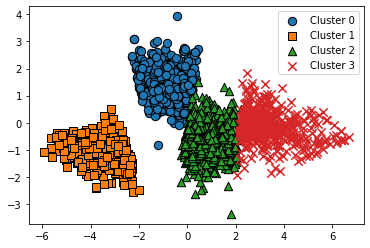

In [22]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm_label = gmm.fit(dt).predict(dt)
dt['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, dt, 'gmm_label',iscenter=False)
#dt['gmm_label']